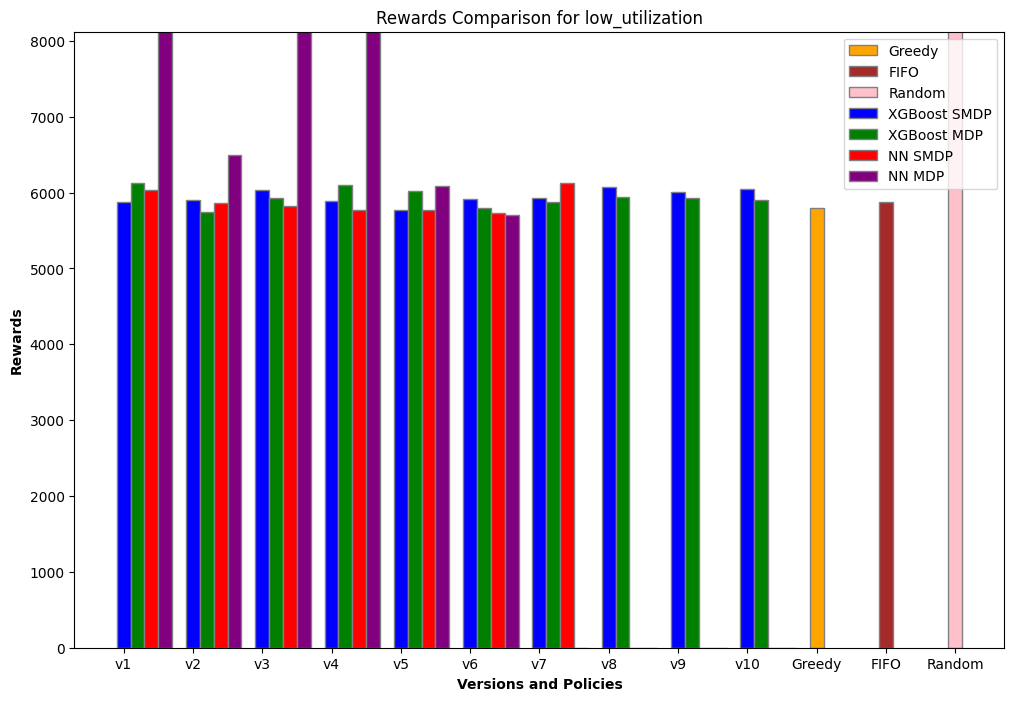

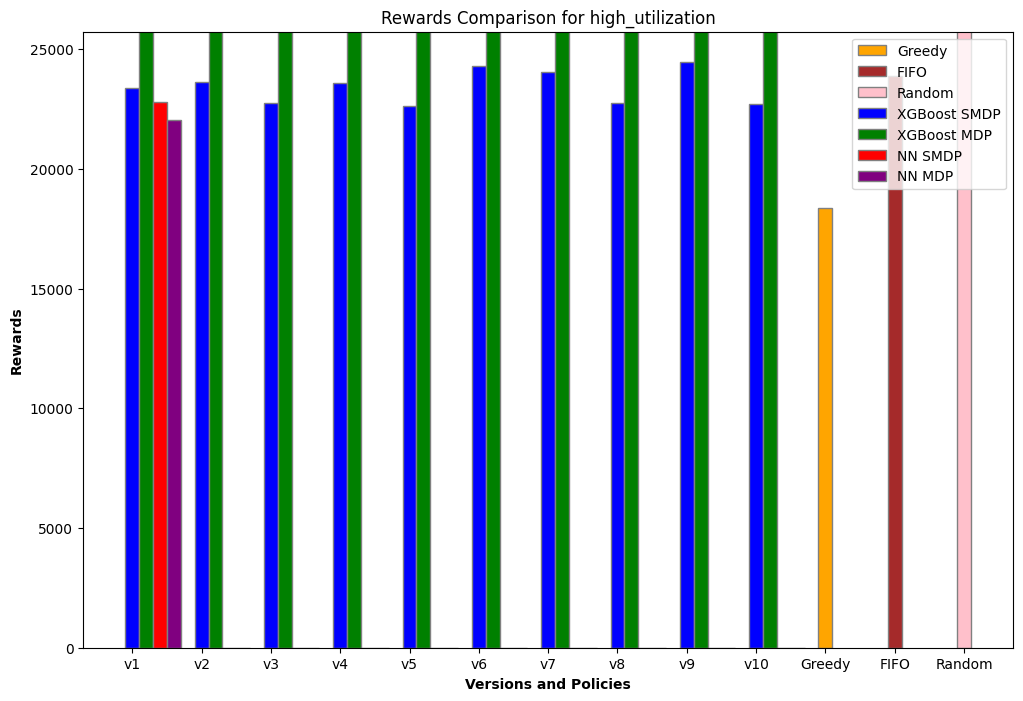

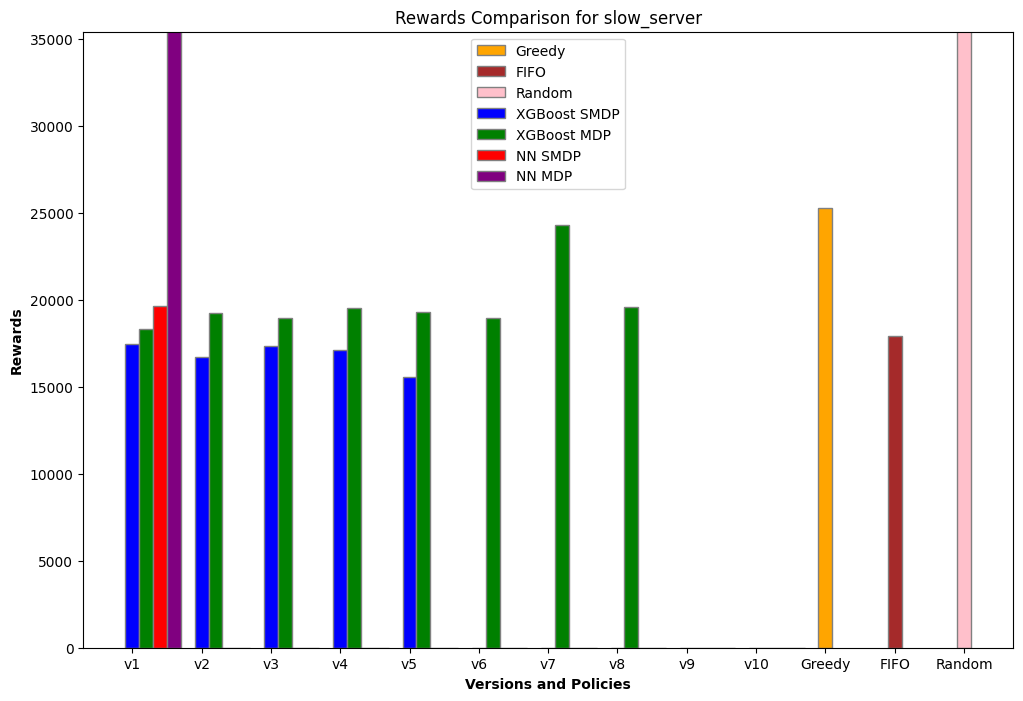

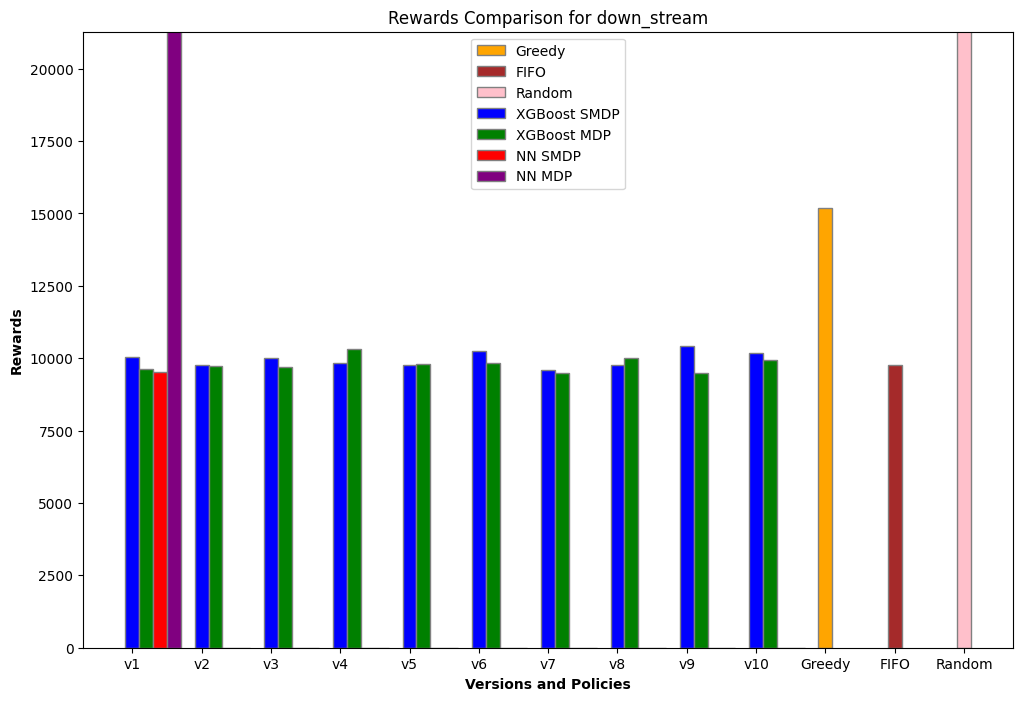

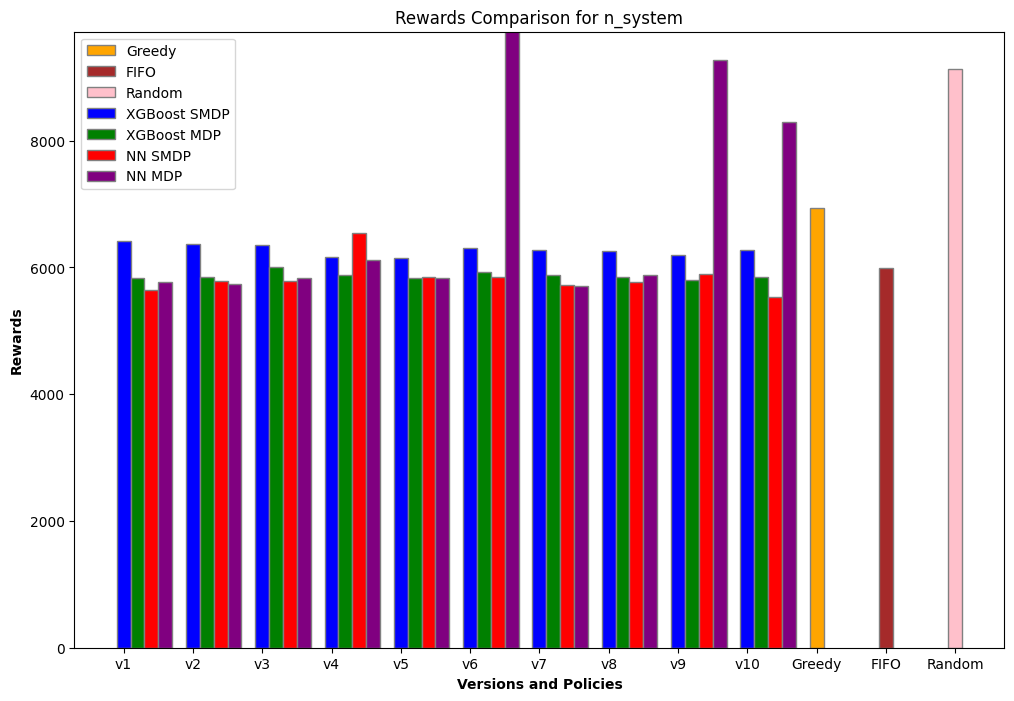

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

config_types = ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system']  # Add other configurations if needed

for config_type in config_types:
    # Read the data
    data = pd.read_csv(f'./results/smdp/results_{config_type}.txt', sep=',', header=None)
    data.columns = ['policy', 'version', 'environment', 'cumulative_reward']
    data.columns = data.columns.str.strip()
    data['policy'] = data['policy'].str.strip()
    data['version'] = data['version'].str.strip()
    data['environment'] = data['environment'].str.strip()

    # Separate policies with and without version numbers
    xgboost_smdp = data[(data['policy'] == 'xgboost') & (data['environment'] == 'smdp')].sort_values(by='version')
    xgboost_mdp = data[(data['policy'] == 'xgboost') & (data['environment'] == 'mdp')].sort_values(by='version')
    nn_smdp = data[(data['policy'] == 'neural_network') & (data['environment'] == 'smdp')].sort_values(by='version')
    nn_mdp = data[(data['policy'] == 'neural_network') & (data['environment'] == 'mdp')].sort_values(by='version')

    xgboost_smdp_rewards = xgboost_smdp['cumulative_reward'].tolist()
    xgboost_mdp_rewards = xgboost_mdp['cumulative_reward'].tolist()
    nn_smdp_rewards = nn_smdp['cumulative_reward'].tolist()
    nn_mdp_rewards = nn_mdp['cumulative_reward'].tolist()

    # Pad the lists with zeros to make their length 10
    xgboost_smdp_rewards += [0] * (10 - len(xgboost_smdp_rewards))
    xgboost_mdp_rewards += [0] * (10 - len(xgboost_mdp_rewards))
    nn_smdp_rewards += [0] * (10 - len(nn_smdp_rewards))
    nn_mdp_rewards += [0] * (10 - len(nn_mdp_rewards))
    
    greedy = data[(data['policy'] == 'Greedy') & (data['environment'] == 'smdp')]['cumulative_reward'].values[0]
    fifo = data[(data['policy'] == 'FIFO') & (data['environment'] == 'smdp')]['cumulative_reward'].values[0]
    random = data[(data['policy'] == 'Random') & (data['environment'] == 'smdp')]['cumulative_reward'].values[0]

    # Version labels
    versions = [f'v{i}' for i in range(1, 11)]

    # Bar width
    bar_width = 0.2

    # Positions of the bars on the x-axis
    r1 = np.arange(len(xgboost_smdp_rewards))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    # Positions for greedy, fifo, and random
    r5 = [r4[-1] + bar_width * 2 + i for i in range(3)]

    # Create the bar chart
    plt.figure(figsize=(12, 8))
    plt.bar(r5[0], abs(greedy), color='orange', width=bar_width, edgecolor='grey', label='Greedy')
    plt.bar(r5[1], abs(fifo), color='brown', width=bar_width, edgecolor='grey', label='FIFO')
    plt.bar(r5[2], abs(random), color='pink', width=bar_width, edgecolor='grey', label='Random')
    plt.bar(r1, [abs(x) for x in xgboost_smdp_rewards], color='blue', width=bar_width, edgecolor='grey', label='XGBoost SMDP')
    plt.bar(r2, [abs(x) for x in xgboost_mdp_rewards], color='green', width=bar_width, edgecolor='grey', label='XGBoost MDP')
    plt.bar(r3, [abs(x) for x in nn_smdp_rewards], color='red', width=bar_width, edgecolor='grey', label='NN SMDP')
    plt.bar(r4, [abs(x) for x in nn_mdp_rewards], color='purple', width=bar_width, edgecolor='grey', label='NN MDP')


    # Add labels
    plt.xlabel('Versions and Policies', fontweight='bold')
    plt.ylabel('Rewards', fontweight='bold')
    plt.xticks(r1.tolist() + r5, versions + ['Greedy', 'FIFO', 'Random'])
    plt.ylim(0, 1.4*abs(greedy))
    # Add title and legend
    plt.title(f'Rewards Comparison for {config_type}')
    plt.legend()

    # Show the plot
    plt.show()